In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#x_train, x_test는 image인데, image의 각 픽셀값을 255로 나누면 0~1사이의 값이 되어서 정규화가 진행이 가능하다.
x_train, x_test = x_train/255., x_test/255.
#위와 같이 255로 나누면 희소 행렬이 되어서 원-핫 인코딩이 불필요하다.
model = tf.keras.Sequential()
#원본이 28*28의 2차원 데이터이기 떄문에 Flatten()레이어를 이용해서 데이터를 일렬로 정렬한다.(다차원 데이터->1차원 데이터)
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
#model.add(tf.keras.layers.Dense(512, input_dim = 784))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
#분류문제의 대부분의 경우 마지막 layer의 활설화 함수로 softmax를 이용한다.
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

print(model.summary())


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_23 (Batc (None, 128)               512       
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1290      
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________
None


In [64]:
#0이 대부분인 mnist데이터셋과 같은 희소 행렬은 대부분 sparse_categorical_crossentropy를 이용한다.(sparse의 의미가 바로 희소 행렬이다)
#반면 아닌 경우에는 categorical_crossentropy를 이용한다.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,y_train, epochs = 25, validation_split = 0.25)

print(model.evaluate(x_test, y_test))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 4s 82us/sample - loss: 0.5054 - accuracy: 0.8250 - val_loss: 0.4485 - val_accuracy: 0.8344
Epoch 2/25
45000/45000 [==============================] - 3s 56us/sample - loss: 0.4099 - accuracy: 0.8528 - val_loss: 0.4160 - val_accuracy: 0.8467
Epoch 3/25
45000/45000 [==============================] - 3s 58us/sample - loss: 0.3839 - accuracy: 0.8622 - val_loss: 0.4650 - val_accuracy: 0.8293
Epoch 4/25
45000/45000 [==============================] - 3s 59us/sample - loss: 0.3615 - accuracy: 0.8690 - val_loss: 0.3995 - val_accuracy: 0.8559
Epoch 5/25
45000/45000 [==============================] - 3s 57us/sample - loss: 0.3507 - accuracy: 0.8723 - val_loss: 0.3893 - val_accuracy: 0.8618
Epoch 6/25
45000/45000 [==============================] - 3s 57us/sample - loss: 0.3384 - accuracy: 0.8780 - val_loss: 0.3838 - val_accuracy: 0.8589
Epoch 7/25
45000/45000 [==============================] 

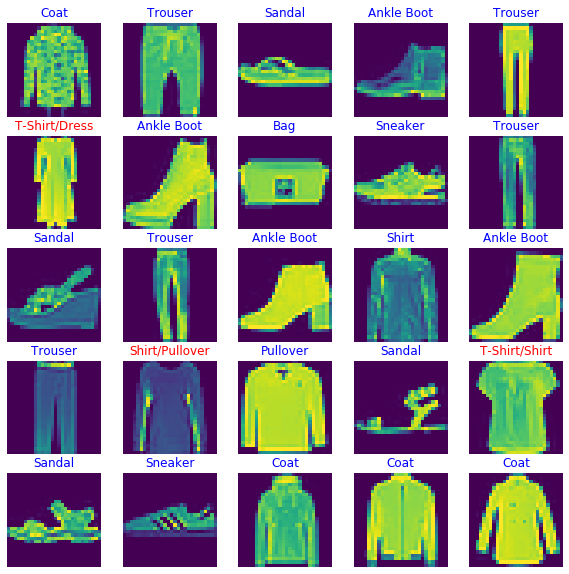

In [65]:
#학습 결과 시각화
test_batch_size = 25
batch_index = np.random.choice(len(x_test), size = test_batch_size, replace = False)
#시각화 처리를 하기 전에 데이터를 전처리해서 가공하는 과정을 거쳐야만한다.
x_te, x_tr = x_test.reshape([-1,28*28]), x_train.reshape([-1,28*28])
x_te, x_tr = x_te.astype(np.float32), x_tr.astype(np.float32)
y_tr, y_te = y_train.astype(np.int32), y_test.astype(np.int32)

batch_x = x_te[batch_index]
batch_y = y_te[batch_index]
y_predict = model(batch_x, training = False)

#10개의 label,혹은 y값을 리스트에 나열한 것이 labels_map이다.
labels_map = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker',8:'Bag', 9:'Ankle Boot'}
fig = plt.figure(figsize = (10,10))
for i, (px,py,y_pred) in enumerate(zip(batch_x,batch_y,y_predict)):
    p = fig.add_subplot(5,5,i+1)
    if np.argmax(y_pred) == py:
        p.set_title('{}'.format(labels_map[py]), color = 'blue')
    else:
        p.set_title('{}/{}'.format(labels_map[np.argmax(y_pred)],labels_map[py]), color = 'red')
    p.imshow(px.reshape(28,28))
    p.axis('off')


In [66]:
#위의 시각화한 결과를 보면 거의 몇개 빼고 실제 데이터와 일치하는 것을 확인 할 수 있다.
#이 방법이 최적의 방법인지 확인하기 위해서 시각화를 해서 val_loss, val_accuracy의 수치 현황을 확인해보려 한다.

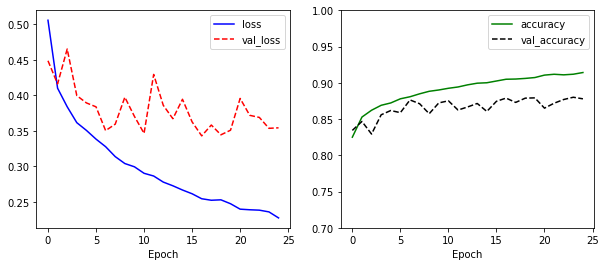

In [67]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

In [ ]:
#여기서 val_loss가 조금씩 증가하는 경향을 보이는데, 이것이 바로 overfitting, 즉 과적합 현상이다.
#이를 막기 위해서 
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100)
history = model.fit(x_train, y_train, epochs = 25, validation_split = 0.25, callbacks = [early_stopping_callback])
#정확도는 86%가량이 나왔지만 CNN의 다른 기법을 이용해서 정확도를 높이는 것은 충분히 가능하다.